In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


In [50]:
# Reading the data
df = pd.read_csv('data/data.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


Accuracy: 0.595
Precision: 0.5692080185439561
Recall: 0.595
F1-score: 0.5161402328956217
Confusion Matrix:
[[ 54 355]
 [ 50 541]]


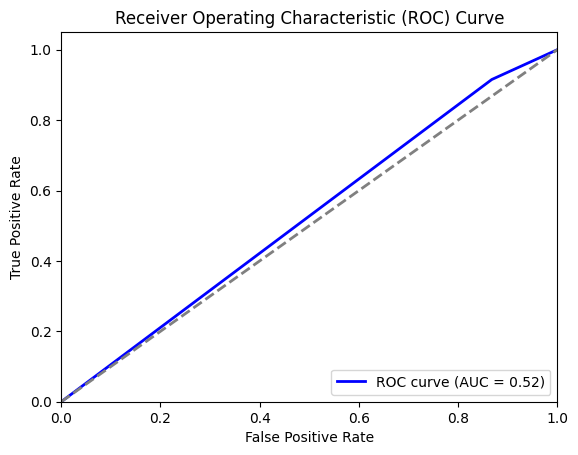

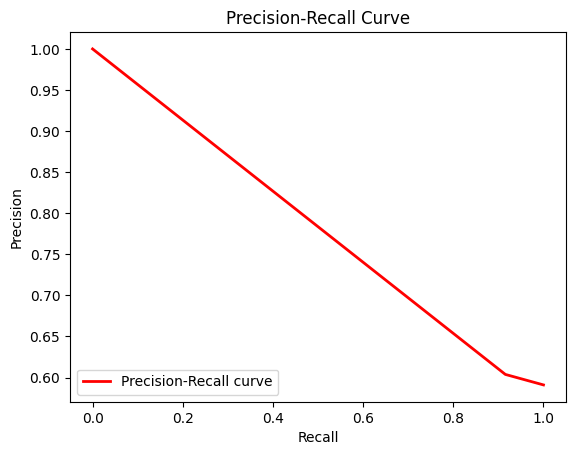

In [67]:
# Builing the One Class SVM using the default parameters:
# Extract features (X) and target variable (y)
X = df.iloc[:, :-1]  # Features (columns 0 to 139)
y = df.iloc[:, -1]   # Target variable (column 140)

# Convert label 0 and 1 to -1 and 1 (1 for normal, -1 for anomaly) as per OSVM convention
y = [1 if pred == 1 else -1 for pred in y]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the One-Class SVM model
ocsvm = OneClassSVM(kernel='rbf', nu=0.1)  # Adjust parameters as needed
ocsvm.fit(X_train)

# Make predictions
y_pred_test = ocsvm.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test,average="weighted")
recall = recall_score(y_test, y_pred_test,average="weighted")
f1 = f1_score(y_test, y_pred_test,average="weighted")

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='red', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

The different parameters that can be fine tuned are as follows"
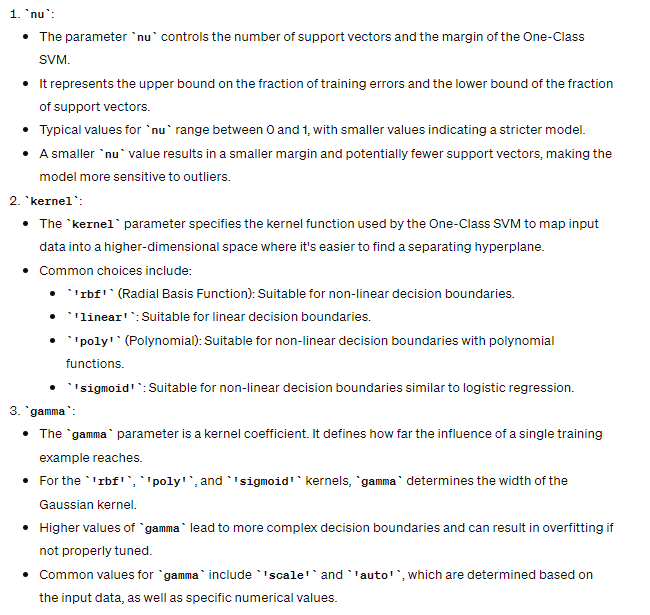
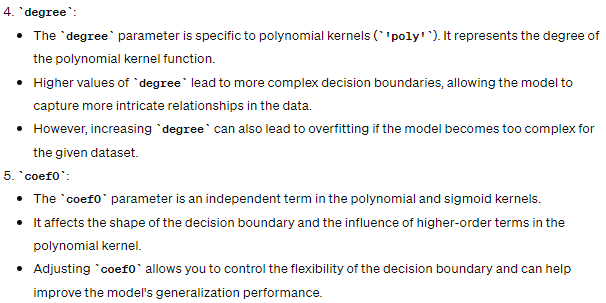

In [75]:
# Performing Grid Search CV to optimize parameters
# Define the parameter grid
# param_grid = {
#     'nu': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],  # Nu parameter values to try
#     'kernel': ['rbf', 'linear', 'poly','sigmoid'], # Kernel types to try
#     'gamma': ['scale', 'auto', 0.1, 0.5, 1.0], # Gamma parameter values to try
#     'degree': [2, 3, 4],  # Degree parameter values to try
#     'coef0': [0.0, 0.5, 1.0]  # Coef0 parameter values to try  # Kernel types to try
# }

param_grid = {
    'nu': [0.3],  # Nu parameter values to try
    'kernel': ['poly'], # Kernel types to try
    'gamma': ['auto'], # Gamma parameter values to try
    'degree': [2],  # Degree parameter values to try
    'coef0': [0.0]  # Coef0 parameter values to try 
}


# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=OneClassSVM(), param_grid=param_grid, cv=10, scoring='accuracy')

# Extract features (X) and target variable (y)
X = df.iloc[:, :-1]  # Features (columns 0 to 139)
y = df.iloc[:, -1]   # Target variable (column 140)

# Convert label 0 and 1 to -1 and 1 (1 for normal, -1 for anomaly) as per OSVM convention
y = [1 if pred == 1 else -1 for pred in y]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'coef0': 0.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly', 'nu': 0.3}
Best Accuracy: 0.6203063909774436


Accuracy: 0.627
Precision: 0.6162858588194484
Recall: 0.627
F1-score: 0.6130277026204469
Confusion Matrix:
[[165 244]
 [129 462]]


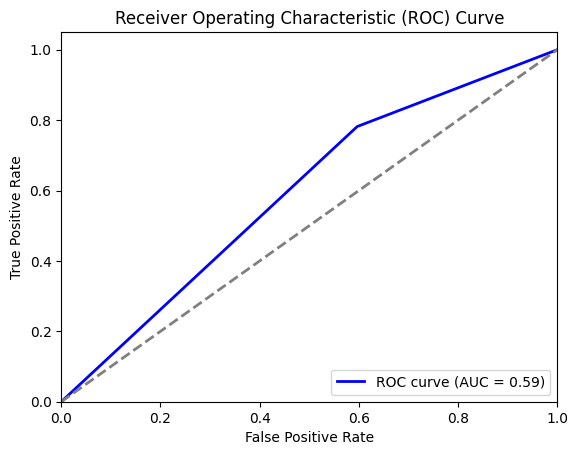

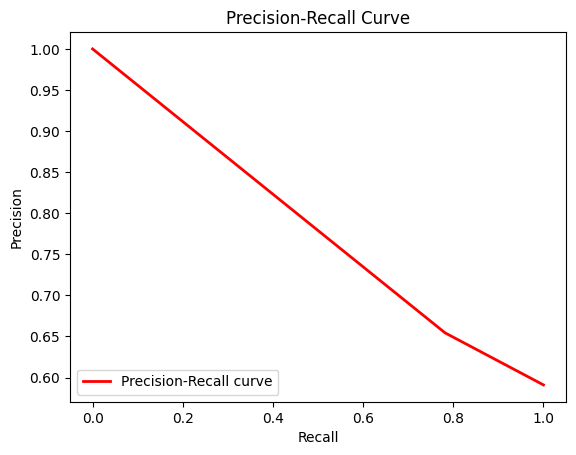

In [76]:
# Builing the One Class SVM using the default parameters:
# Extract features (X) and target variable (y)
X = df.iloc[:, :-1]  # Features (columns 0 to 139)
y = df.iloc[:, -1]   # Target variable (column 140)

# Convert label 0 and 1 to -1 and 1 (1 for normal, -1 for anomaly) as per OSVM convention
y = [1 if pred == 1 else -1 for pred in y]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the One-Class SVM model
ocsvm = OneClassSVM(nu=0.3,kernel='poly', degree=2,gamma='auto',coef0=0.0 )  # Adjust parameters as needed
ocsvm.fit(X_train)

# Make predictions
y_pred_test = ocsvm.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test,average="weighted")
recall = recall_score(y_test, y_pred_test,average="weighted")
f1 = f1_score(y_test, y_pred_test,average="weighted")

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='red', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()